<a href="https://colab.research.google.com/github/VivekJeldi/RiskAnalytics-CreditCard/blob/main/Code_XGBoost_WOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn import metrics

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTEENN

from sklearn.model_selection import GridSearchCV

In [5]:
path = 'https://raw.githubusercontent.com/VivekJeldi/RiskAnalytics-CreditCard/main/WOE_data_1.csv'

In [242]:
df = pd.read_csv(path)
df.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Total No of Trades,Performance Tag
0,954457215,-0.266456,-0.20095,-0.203681,-0.273577,-0.798980,-0.564476,-0.920517,-0.879541,-0.139263,-0.724382,0
1,432830445,-0.266456,-0.20095,-0.203681,-0.273577,-0.798980,-0.564476,-0.920517,-0.879541,-0.438558,0.277395,0
2,941387308,-0.266456,-0.20095,-0.203681,-0.273577,-0.798980,-0.564476,-0.920517,-0.879541,-0.139263,-0.724382,0
3,392161677,-0.266456,-0.20095,-0.203681,-0.273577,-0.057889,-0.564476,-0.920517,-0.879541,-0.139263,-0.724382,0
4,182011211,-0.266456,-0.20095,-0.203681,-0.273577,-0.057889,-0.564476,-0.920517,-0.879541,-0.139263,-0.724382,0


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68536 entries, 0 to 68535
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   68536 non-null  int64  
 1   No of times 90 DPD or worse in last 6 months                     68536 non-null  float64
 2   No of times 30 DPD or worse in last 6 months                     68536 non-null  float64
 3   No of times 60 DPD or worse in last 12 months                    68536 non-null  float64
 4   No of times 30 DPD or worse in last 12 months                    68536 non-null  float64
 5   Avgas CC Utilization in last 12 months                           68536 non-null  float64
 6   No of trades opened in last 6 months                             68536 non-null  float64
 7   No of trades opened in last 12 months   

In [244]:
#df_cat = df.select_dtypes(include='object')


In [250]:
df['Performance Tag'] = df['Performance Tag'].astype('int64')

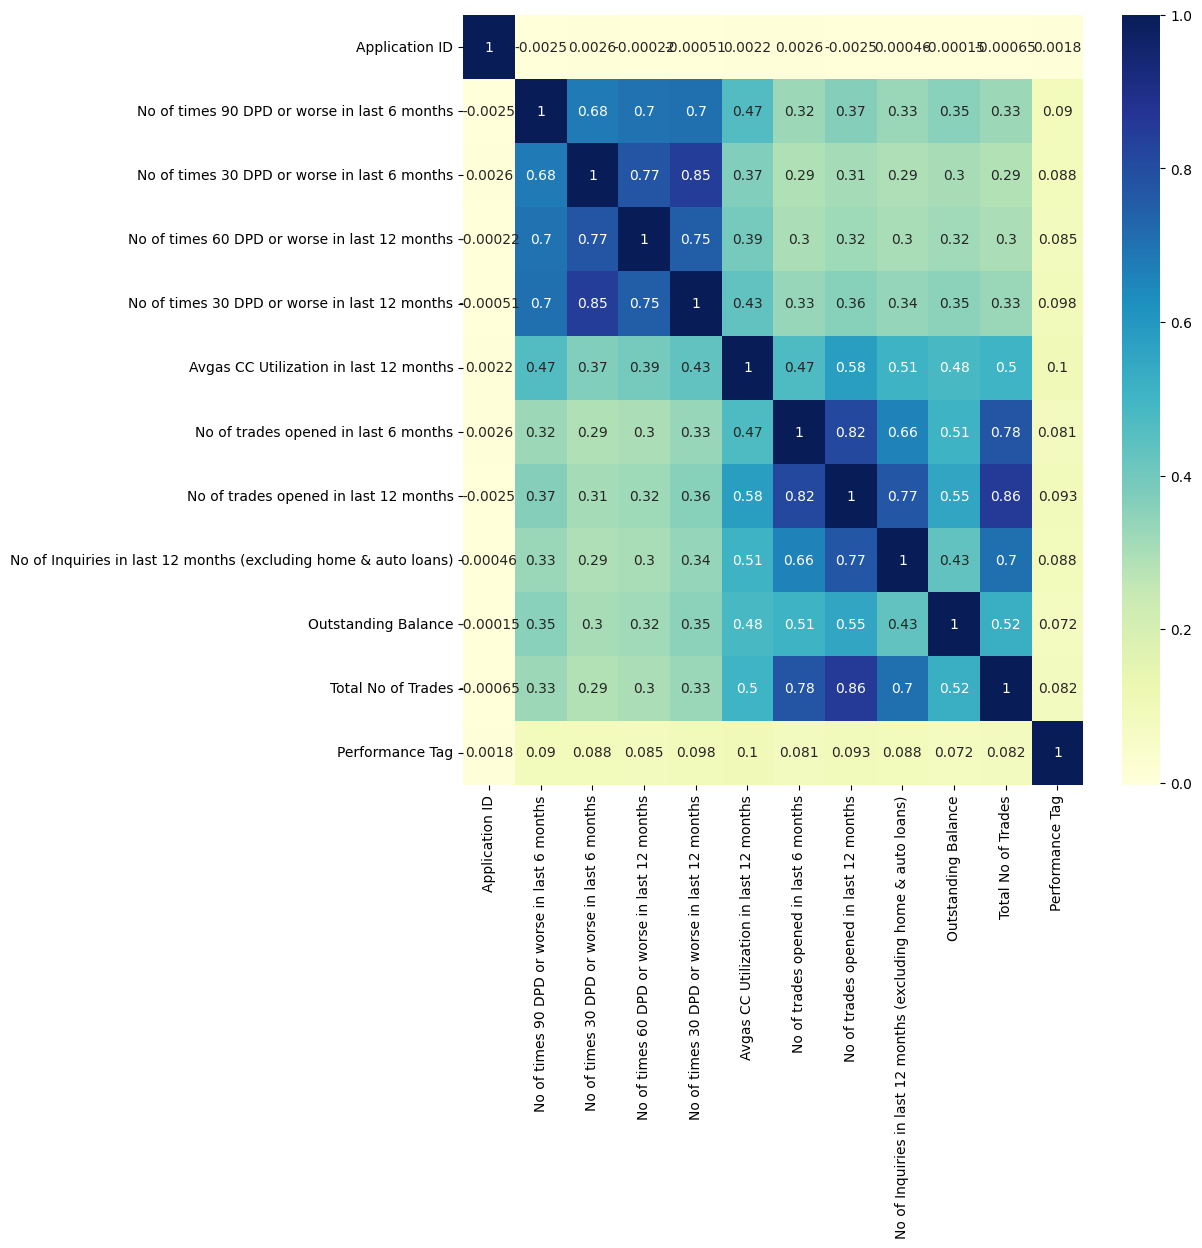

In [251]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [10]:
df['Performance Tag'] = df['Performance Tag'].astype('category')

In [249]:
df['Performance Tag'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [12]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
y_test = df_test['Performance Tag']
X_test = df_test.drop('Performance Tag', axis=1)

In [14]:
X_test.shape

(13708, 11)

In [15]:
y_train = df_train['Performance Tag']
X_train = df_train.drop('Performance Tag', axis=1)

In [16]:
X_train.shape

(54828, 11)

In [17]:
X_train = X_train.drop('Application ID', 1)


In [18]:
col = X_train.columns

In [19]:
sum(y_train)

2317

In [20]:
len(y_train)

54828

In [21]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [22]:
y_pred = model.predict(X_test[col])

In [23]:
metrics.confusion_matrix(y_test, y_pred)

array([[13130,     4],
       [  573,     1]])

In [24]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [25]:
X_train_sm.head()

,No of times 90 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Total No of Trades
0,-0.266456,-0.20095,-0.203681,-0.273577,-0.798980,0.325684,0.229537,0.183938,-0.139263,0.277395
1,-0.266456,-0.20095,-0.203681,-0.273577,-0.798980,-0.564476,0.229537,-0.879541,0.406502,0.277395
2,-0.266456,-0.20095,-0.203681,-0.273577,-0.057889,-0.564476,-0.920517,-0.879541,-0.438558,-0.724382
3,-0.266456,-0.20095,-0.203681,-0.273577,0.515250,-0.564476,0.229537,0.183938,-0.438558,0.277395
4,-0.266456,-0.20095,-0.203681,-0.273577,-0.057889,0.301505,0.365293,0.365120,-0.139263,0.275152


In [26]:
sum(y_train_sm)

52511

In [27]:
len(y_train_sm)

105022

In [28]:
model_sm = XGBClassifier()
model_sm.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
y_pred_sm = model_sm.predict(X_test[col])

In [30]:
metrics.confusion_matrix(y_test, y_pred_sm)

array([[10014,  3120],
       [  344,   230]])

In [31]:
print(metrics.classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     13134
           1       0.07      0.40      0.12       574

    accuracy                           0.75     13708
   macro avg       0.52      0.58      0.48     13708
weighted avg       0.93      0.75      0.82     13708



In [33]:
n_folds = 5

xgb = XGBClassifier()

scorer = {
    #'accuracy': make_scorer(accuracy_score),
    #'f1': make_scorer(f1_score)
    'recall' : metrics.make_scorer(metrics.recall_score)
    }

imba_pipeline = make_pipeline(SMOTE(random_state=100), xgb)
#imba_pipeline = make_pipeline(SMOTENC(categorical_features=list(df_cat.columns), random_state=42), xgb)

param = 'xgbclassifier__'

Sub Sample

In [34]:
# specify range of hyperparameters
param_grid = {param+'subsample': [0.3, 0.6, 0.9]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='recall', verbose=1)

In [35]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.739051,0.811133,0.031404,0.000587,0.3,{'xgbclassifier__subsample': 0.3},0.367171,0.30819,0.346983,0.382289,...,0.343130,0.029592,1,0.488673,0.428494,0.434431,0.470334,0.432578,0.450902,0.024139
1,8.145932,0.849229,0.032992,0.001854,0.6,{'xgbclassifier__subsample': 0.6},0.358531,0.31250,0.331897,0.341253,...,0.331903,0.017015,3,0.479504,0.434431,0.433351,0.417476,0.451456,0.443244,0.021080
2,7.649082,0.690015,0.031680,0.000541,0.9,{'xgbclassifier__subsample': 0.9},0.356371,0.30819,0.340517,0.395248,...,0.339677,0.034904,2,0.476807,0.427415,0.433891,0.465480,0.416936,0.444106,0.023010


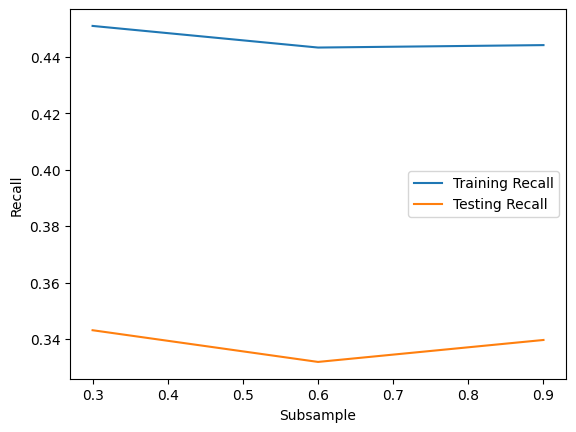

In [36]:
plt.figure()

plt.plot(scores['param_xgbclassifier__subsample'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__subsample'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Subsample')
plt.ylabel('Recall')

plt.show()

In [37]:
y_pred_sub = model_cv.predict(X_test[col])

In [38]:
print(metrics.classification_report(y_test, y_pred_sub))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     13134
           1       0.07      0.40      0.11       574

    accuracy                           0.74     13708
   macro avg       0.52      0.58      0.48     13708
weighted avg       0.93      0.74      0.82     13708



In [39]:
metrics.confusion_matrix(y_test, y_pred_sub)

array([[9912, 3222],
       [ 345,  229]])

Learning Rate

In [40]:
# Learning Rate
param_grid = {param+'learning_rate': [0.2, 0.4, 0.6]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__learning_rate': [0.2, 0.4, 0.6]},
             return_train_score=True, scoring='recall', verbose=1)

In [41]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.213739,1.023719,0.033920,0.003689,0.2,{'xgbclassifier__learning_rate': 0.2},0.356371,0.316810,0.325431,0.362851,...,0.336656,0.019053,3,0.457929,0.426875,0.406368,0.402913,0.411003,0.421018,0.020196
1,6.994774,0.852627,0.031432,0.000820,0.4,{'xgbclassifier__learning_rate': 0.4},0.358531,0.293103,0.346983,0.386609,...,0.339248,0.033470,2,0.489213,0.437129,0.450081,0.477346,0.442287,0.459211,0.020427
2,7.068674,0.827775,0.033273,0.004234,0.6,{'xgbclassifier__learning_rate': 0.6},0.360691,0.306034,0.355603,0.371490,...,0.340967,0.027027,1,0.503236,0.457097,0.470049,0.479504,0.443905,0.470758,0.020197


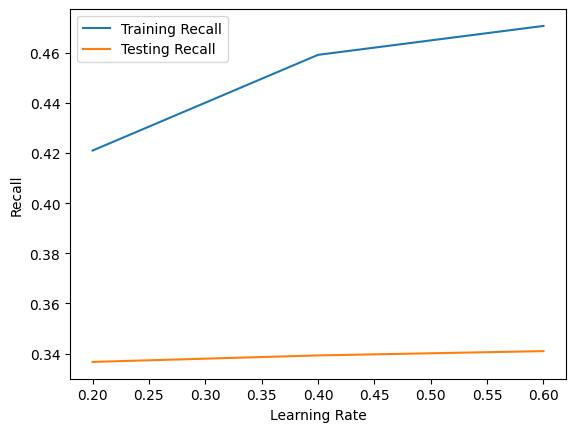

In [42]:
plt.figure()

plt.plot(scores['param_xgbclassifier__learning_rate'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__learning_rate'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Recall')

plt.show()

In [43]:
#print(model_cv.best_estimator_)

In [44]:
y_pred = model_cv.predict(X_test[col])

In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     13134
           1       0.06      0.45      0.11       574

    accuracy                           0.68     13708
   macro avg       0.51      0.57      0.46     13708
weighted avg       0.93      0.68      0.78     13708



In [46]:
metrics.confusion_matrix(y_test, y_pred)

array([[9084, 4050],
       [ 313,  261]])

In [47]:
# Max Depth
param_grid = {param+'max_depth': [1,3,5]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__max_depth': [1, 3, 5]},
             return_train_score=True, scoring='recall', verbose=1)

In [48]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.295057,0.004491,0.015287,0.001657,1,{'xgbclassifier__max_depth': 1},0.652268,0.538793,0.596983,0.686825,...,0.612036,0.051995,1,0.679072,0.594711,0.586616,0.665588,0.586300,0.622458,0.041054
1,3.570786,0.657807,0.027357,0.012919,3,{'xgbclassifier__max_depth': 3},0.354212,0.342672,0.327586,0.328294,...,0.336212,0.010635,3,0.402373,0.391257,0.376147,0.354369,0.382956,0.381420,0.016110
2,5.564683,0.846714,0.030263,0.004631,5,{'xgbclassifier__max_depth': 5},0.369330,0.316810,0.336207,0.356371,...,0.337083,0.023440,2,0.461704,0.416622,0.411225,0.402913,0.389968,0.416486,0.024330


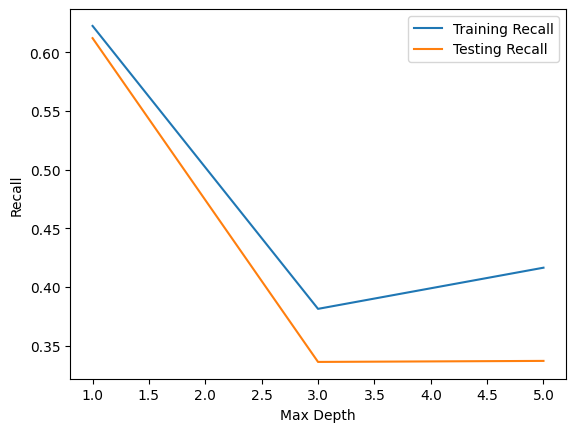

In [49]:
plt.figure()

plt.plot(scores['param_xgbclassifier__max_depth'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__max_depth'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Recall')

plt.show()

In [50]:
y_pred = model_cv.predict(X_test[col])

In [51]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.56      0.71     13134
           1       0.07      0.72      0.12       574

    accuracy                           0.57     13708
   macro avg       0.52      0.64      0.42     13708
weighted avg       0.94      0.57      0.69     13708



In [52]:
metrics.confusion_matrix(y_test, y_pred)

array([[7393, 5741],
       [ 163,  411]])

In [53]:
# Number of Estimators
param_grid = {param+'n_estimators': [100,200,500,700,1000]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__n_estimators': [100, 200, 500, 700,
                                                         1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [54]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.948749,0.711377,0.043750,0.024332,100,{'xgbclassifier__n_estimators': 100},0.360691,0.303879,0.336207,0.365011,...,0.331905,0.028932,5,0.480583,0.427955,0.433351,0.417476,0.410464,0.433966,0.024633
1,13.860626,0.541341,0.066067,0.029418,200,{'xgbclassifier__n_estimators': 200},0.362851,0.310345,0.353448,0.326134,...,0.333623,0.020879,3,0.497303,0.453319,0.463573,0.426106,0.442287,0.456517,0.023878
2,34.422648,0.558618,0.120522,0.009484,500,{'xgbclassifier__n_estimators': 500},0.365011,0.321121,0.355603,0.306695,...,0.332753,0.023153,4,0.514024,0.465731,0.478144,0.436893,0.454153,0.469789,0.025960
3,49.659344,3.592344,0.163194,0.005444,700,{'xgbclassifier__n_estimators': 700},0.369330,0.325431,0.357759,0.311015,...,0.335342,0.023829,1,0.521575,0.475985,0.484080,0.440129,0.452535,0.474861,0.028189
4,67.631688,0.575349,0.277860,0.096916,1000,{'xgbclassifier__n_estimators': 1000},0.369330,0.327586,0.355603,0.311015,...,0.335342,0.023277,1,0.523732,0.483001,0.483001,0.441748,0.453614,0.477019,0.028445


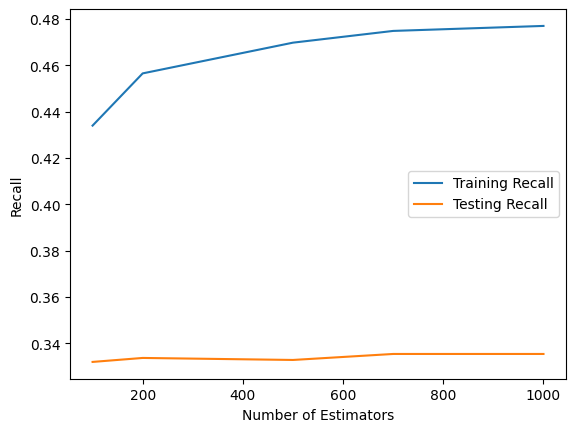

In [55]:
plt.figure()

plt.plot(scores['param_xgbclassifier__n_estimators'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__n_estimators'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Recall')

plt.show()

In [56]:
y_pred = model_cv.predict(X_test[col])

In [57]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     13134
           1       0.06      0.45      0.11       574

    accuracy                           0.68     13708
   macro avg       0.51      0.57      0.46     13708
weighted avg       0.93      0.68      0.78     13708



In [58]:
metrics.confusion_matrix(y_test, y_pred)

array([[9082, 4052],
       [ 315,  259]])

In [110]:
# Maximum leaves
param_grid = {param+'max_leaves': [0,500,1000]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__max_leaves': [0, 500, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [111]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__max_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.095468,1.144999,0.031376,0.001743,0,{'xgbclassifier__max_leaves': 0},0.360691,0.303879,0.336207,0.365011,...,0.331905,0.028932,1,0.480583,0.427955,0.433351,0.417476,0.410464,0.433966,0.024633
1,6.811367,0.828278,0.031375,0.001042,500,{'xgbclassifier__max_leaves': 500},0.360691,0.303879,0.336207,0.365011,...,0.331905,0.028932,1,0.480583,0.427955,0.433351,0.417476,0.410464,0.433966,0.024633
2,6.814436,0.843780,0.030994,0.000725,1000,{'xgbclassifier__max_leaves': 1000},0.360691,0.303879,0.336207,0.365011,...,0.331905,0.028932,1,0.480583,0.427955,0.433351,0.417476,0.410464,0.433966,0.024633


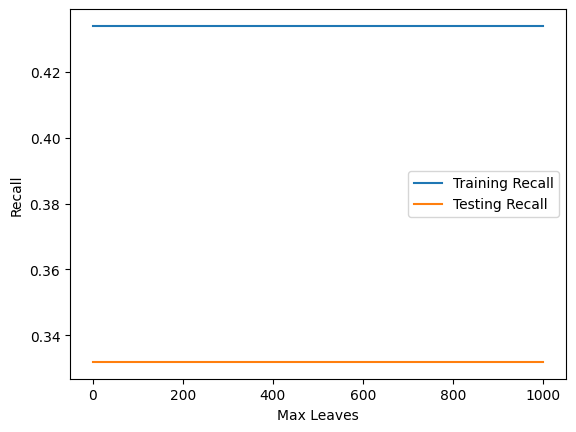

In [113]:
plt.figure()

plt.plot(scores['param_xgbclassifier__max_leaves'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__max_leaves'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Max Leaves')
plt.ylabel('Recall')

plt.show()

In [114]:
y_pred = model_cv.predict(X_test[col])

In [115]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     13134
           1       0.06      0.44      0.11       574

    accuracy                           0.70     13708
   macro avg       0.51      0.58      0.46     13708
weighted avg       0.93      0.70      0.79     13708



In [116]:
metrics.confusion_matrix(y_test, y_pred)

array([[9303, 3831],
       [ 319,  255]])

In [117]:
# lambda
param_grid = {param+'lambda': [0.1,0.5,1]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__lambda': [0.1, 0.5, 1]},
             return_train_score=True, scoring='recall', verbose=1)

In [118]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.443315,4.149616,0.036183,0.010470,0.1,{'xgbclassifier__lambda': 0.1},0.349892,0.295259,0.344828,0.343413,...,0.326721,0.023815,3,0.473571,0.434970,0.444145,0.413161,0.425027,0.438175,0.020481
1,6.822621,0.820336,0.030898,0.000248,0.5,{'xgbclassifier__lambda': 0.5},0.360691,0.306034,0.336207,0.365011,...,0.333632,0.026839,1,0.487055,0.431732,0.437129,0.422330,0.422330,0.440115,0.024146
2,6.957922,0.619313,0.040792,0.015532,1,{'xgbclassifier__lambda': 1},0.360691,0.303879,0.336207,0.365011,...,0.331905,0.028932,2,0.480583,0.427955,0.433351,0.417476,0.410464,0.433966,0.024633


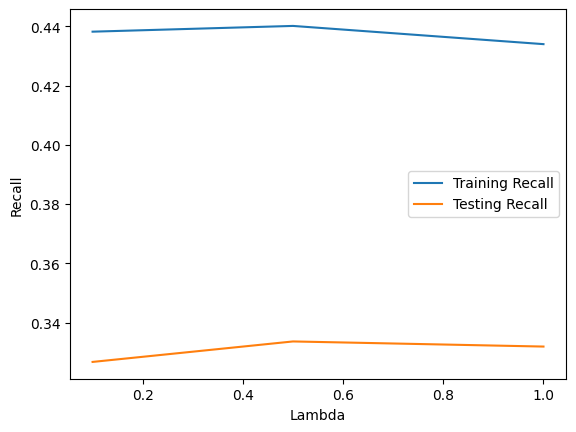

In [119]:
plt.figure()

plt.plot(scores['param_xgbclassifier__lambda'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__lambda'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Recall')

plt.show()

In [120]:
y_pred = model_cv.predict(X_test[col])

In [121]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     13134
           1       0.06      0.44      0.11       574

    accuracy                           0.69     13708
   macro avg       0.51      0.57      0.46     13708
weighted avg       0.93      0.69      0.78     13708



In [122]:
metrics.confusion_matrix(y_test, y_pred)

array([[9161, 3973],
       [ 322,  252]])

In [134]:
# Alpha
param_grid = {param+'alpha': range(5)}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__alpha': range(0, 5)},
             return_train_score=True, scoring='recall', verbose=1)

In [135]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.216630,1.316663,0.030541,0.000411,0,{'xgbclassifier__alpha': 0},0.360691,0.303879,0.336207,0.365011,...,0.331905,0.028932,1,0.480583,0.427955,0.433351,0.417476,0.410464,0.433966,0.024633
1,6.844081,0.827151,0.031512,0.001308,1,{'xgbclassifier__alpha': 1},0.343413,0.314655,0.321121,0.343413,...,0.323699,0.018103,5,0.469795,0.433891,0.422558,0.415318,0.416397,0.431592,0.020209
2,6.956274,0.986770,0.030559,0.000292,2,{'xgbclassifier__alpha': 2},0.347732,0.308190,0.331897,0.343413,...,0.326289,0.018931,4,0.467098,0.424177,0.427955,0.403452,0.415858,0.427708,0.021414
3,6.832490,0.803209,0.031104,0.000497,3,{'xgbclassifier__alpha': 3},0.352052,0.316810,0.325431,0.347732,...,0.328016,0.019981,3,0.469795,0.426336,0.420399,0.408846,0.411543,0.427384,0.022105
4,6.809469,0.832929,0.032900,0.004473,4,{'xgbclassifier__alpha': 4},0.354212,0.312500,0.338362,0.349892,...,0.330604,0.021802,2,0.472492,0.425796,0.431193,0.406688,0.407767,0.428787,0.023896


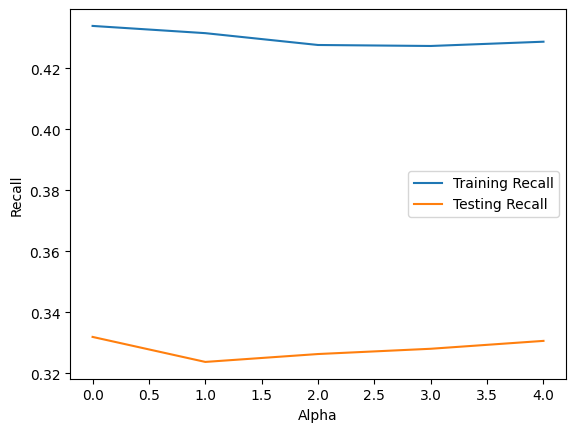

In [136]:
plt.figure()

plt.plot(scores['param_xgbclassifier__alpha'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__alpha'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Recall')

plt.show()

In [137]:
y_pred = model_cv.predict(X_test[col])

In [138]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     13134
           1       0.06      0.44      0.11       574

    accuracy                           0.70     13708
   macro avg       0.51      0.58      0.46     13708
weighted avg       0.93      0.70      0.79     13708



In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[9082, 4052],
       [ 315,  259]])

In [165]:
# Gamma
param_grid = {param+'gamma': [1,1000,2000]}

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__gamma': [1, 1000, 2000]},
             return_train_score=True, scoring='recall', verbose=1)

In [166]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.263388,0.733737,0.031309,0.000457,1,{'xgbclassifier__gamma': 1},0.356371,0.299569,0.323276,0.354212,...,0.327593,0.023968,3,0.470334,0.433351,0.425256,0.402913,0.420173,0.430405,0.022316
1,7.198836,0.809277,0.012607,0.000187,1000,{'xgbclassifier__gamma': 1000},0.740821,0.711207,0.620690,0.773218,...,0.716919,0.051974,2,0.762136,0.757151,0.605505,0.760518,0.738403,0.724742,0.060221
2,7.159119,0.769288,0.015766,0.006022,2000,{'xgbclassifier__gamma': 2000},0.701944,0.754310,0.620690,0.742981,...,0.733315,0.073550,1,0.731392,0.797086,0.605505,0.721143,0.828479,0.736721,0.076879


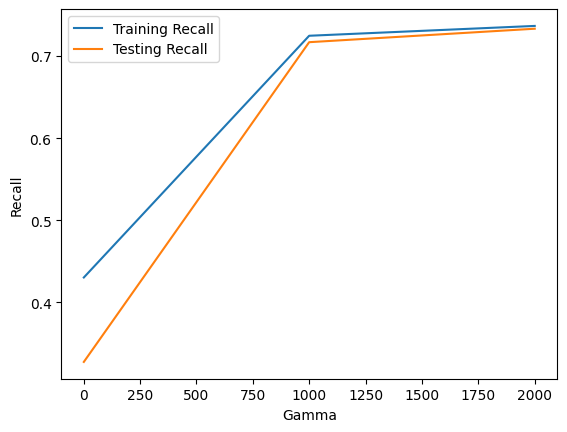

In [167]:
plt.figure()

plt.plot(scores['param_xgbclassifier__gamma'],
         scores['mean_train_score'],
         label='Training Recall')
plt.plot(scores['param_xgbclassifier__gamma'],
         scores['mean_test_score'],
         label='Testing Recall')

plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Recall')

plt.show()

In [168]:
y_pred = model_cv.predict(X_test[col])

In [169]:
  print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.49      0.65     13134
           1       0.06      0.78      0.11       574

    accuracy                           0.50     13708
   macro avg       0.52      0.63      0.38     13708
weighted avg       0.94      0.50      0.63     13708



In [170]:
metrics.confusion_matrix(y_test, y_pred)

array([[6390, 6744],
       [ 129,  445]])

In [175]:
# Hyperparameter Tuning
param_grid = {
              param+'max_depth': [1] ,
              param+'n_estimators': [100, 500],
              param+'learning_rate' :[0.4, 0.6],
              param+'subsample': [0.4, 0.6],
              param+'gamma':[500,2000]

    }

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = imba_pipeline,
                        param_grid = param_grid,
                        scoring= 'recall',
                        #refit='recall',
                        cv = n_folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      im...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__gamma': [500, 2000],
                         'xgbclassifier__learning_rate': [0.4, 0.6],
                         'xgbclassifier__max_depth': [1],
                         'xgbclassifier__n_estimators': [100, 500],
                         'xgbclassifier__subsample': [0.4, 0.6]},
             return_train_score=True, scoring='recall', verbose=1)

In [176]:
scores = pd.DataFrame(model_cv.cv_results_)
scores.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__gamma,param_xgbclassifier__learning_rate,param_xgbclassifier__max_depth,param_xgbclassifier__n_estimators,param_xgbclassifier__subsample,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
8,1.590243,0.007041,0.012793,0.001193,2000,0.4,1,100,0.4,"{'xgbclassifier__gamma': 2000, 'xgbclassifier_...",...,0.849803,0.014318,1,0.854369,0.852671,0.845116,0.850593,0.846278,0.849806,0.00358
10,8.801773,0.666136,0.019075,0.000514,2000,0.4,1,500,0.4,"{'xgbclassifier__gamma': 2000, 'xgbclassifier_...",...,0.849803,0.014318,1,0.854369,0.852671,0.845116,0.850593,0.846278,0.849806,0.00358
12,1.918060,0.647140,0.012778,0.001279,2000,0.6,1,100,0.4,"{'xgbclassifier__gamma': 2000, 'xgbclassifier_...",...,0.849803,0.014318,1,0.854369,0.852671,0.845116,0.850593,0.846278,0.849806,0.00358
13,1.981287,0.656405,0.015339,0.003971,2000,0.6,1,100,0.6,"{'xgbclassifier__gamma': 2000, 'xgbclassifier_...",...,0.849803,0.014318,1,0.854369,0.852671,0.845116,0.850593,0.846278,0.849806,0.00358
14,8.774003,0.658836,0.019279,0.000763,2000,0.6,1,500,0.4,"{'xgbclassifier__gamma': 2000, 'xgbclassifier_...",...,0.849803,0.014318,1,0.854369,0.852671,0.845116,0.850593,0.846278,0.849806,0.00358


In [179]:
model_cv.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=100)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=2000, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.4,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [180]:
y_pred = model_cv.predict(X_test[col])

In [181]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.36      0.53     13134
           1       0.06      0.87      0.11       574

    accuracy                           0.38     13708
   macro avg       0.52      0.62      0.32     13708
weighted avg       0.95      0.38      0.51     13708



In [182]:
metrics.confusion_matrix(y_test, y_pred)

array([[4759, 8375],
       [  74,  500]])

Final Hyperparameters

In [194]:
# Hyperparameter Tuning
params = {'max_depth': 1,
    'n_estimators': 100,
    'subsample': 0.6,
    'learning_rate': 0.4,
    'gamma': 1000
    }

model_final = XGBClassifier(**params)

model_final.fit(X_train_sm, y_train_sm)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1000, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [195]:
y_pred = model_final.predict(X_test[col])

In [196]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.64      0.77     13134
           1       0.07      0.64      0.13       574

    accuracy                           0.64     13708
   macro avg       0.52      0.64      0.45     13708
weighted avg       0.94      0.64      0.75     13708



In [197]:
metrics.confusion_matrix(y_test, y_pred)

array([[8435, 4699],
       [ 209,  365]])

In [198]:
metrics.roc_auc_score(y_test, y_pred)

0.6390573923359802

Gain, Lift and KS Statistic

In [193]:
len(df)

68536

In [199]:
y_pred_final = model_final.predict_proba(df[col])

In [200]:
y_pred_1 = y_pred_final[:, 1]

In [201]:
y_pred_df = pd.DataFrame(y_pred_1)
y_pred_df.head()

,0
0,0.323204
1,0.323204
2,0.323204
3,0.323204
4,0.323204


In [202]:
df_pred = pd.concat([df[['Application ID', 'Performance Tag']], y_pred_df], axis=1)
df_pred.head()

,Application ID,Performance Tag,0
0,954457215,0,0.323204
1,432830445,0,0.323204
2,941387308,0,0.323204
3,392161677,0,0.323204
4,182011211,0,0.323204


In [203]:
df_pred.shape

(68536, 3)

In [204]:
df_pred = df_pred.rename(columns={0:'pred_prob'})
df_pred.head()

,Application ID,Performance Tag,pred_prob
0,954457215,0,0.323204
1,432830445,0,0.323204
2,941387308,0,0.323204
3,392161677,0,0.323204
4,182011211,0,0.323204


In [205]:
df_pred = df_pred.sort_values('pred_prob', ascending=False)
df_pred.head()

,Application ID,Performance Tag,pred_prob
68535,37493797,0,0.63327
59087,689648437,0,0.63327
59103,930235305,0,0.63327
59102,421200213,0,0.63327
59101,96788413,0,0.63327


In [206]:
df_pred['default'] = df_pred['pred_prob'].map(lambda x:1 if x>0.5 else 0)
df_pred.head()

,Application ID,Performance Tag,pred_prob,default
68535,37493797,0,0.63327,1
59087,689648437,0,0.63327,1
59103,930235305,0,0.63327,1
59102,421200213,0,0.63327,1
59101,96788413,0,0.63327,1


In [207]:
df_pred['index'] = range(len(df_pred),0,-1)
df_pred.head()

,Application ID,Performance Tag,pred_prob,default,index
68535,37493797,0,0.63327,1,68536
59087,689648437,0,0.63327,1,68535
59103,930235305,0,0.63327,1,68534
59102,421200213,0,0.63327,1,68533
59101,96788413,0,0.63327,1,68532


In [208]:
df_pred['Decile'] = pd.qcut(df_pred['index'], q=10, labels=range(10,0,-1), duplicates='drop')
df_pred.head()


,Application ID,Performance Tag,pred_prob,default,index,Decile
68535,37493797,0,0.63327,1,68536,1
59087,689648437,0,0.63327,1,68535,1
59103,930235305,0,0.63327,1,68534,1
59102,421200213,0,0.63327,1,68533,1
59101,96788413,0,0.63327,1,68532,1


In [220]:
df_pred['Performance Tag'] = df_pred['Performance Tag'].astype('int32')

In [221]:
df_pred['Decile'].unique()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Categories (10, int64): [10 < 9 < 8 < 7 ... 4 < 3 < 2 < 1]

In [222]:
df_pred['Decile'].nunique()

10

In [223]:
df_pred.groupby(by='Decile').count()

,Application ID,Performance Tag,pred_prob,default,index
Decile,,,,,
10,6854,6854,6854,6854,6854
9,6854,6854,6854,6854,6854
8,6853,6853,6853,6853,6853
7,6854,6854,6854,6854,6854
6,6853,6853,6853,6853,6853
5,6854,6854,6854,6854,6854
4,6853,6853,6853,6853,6853
3,6854,6854,6854,6854,6854
2,6853,6853,6853,6853,6853


In [224]:
# bin_edges = np.linspace(df_pred['pred_prob'].max(), df_pred['pred_prob'].min(), num=10)
# bin_edges


In [225]:
# bins = np.digitize(df_pred['pred_prob'], bin_edges, right=True)
# bins


In [226]:
# df_pred['Decile'] = bins
# df_pred.head()

In [227]:
df_by_decile = df_pred.groupby('Decile')


In [228]:
df_by_decile['default'].sum()

Decile
10       0
9        0
8        0
7        0
6        0
5        0
4     4357
3     6854
2     6853
1     6854
Name: default, dtype: int64

In [229]:
df_KS = pd.DataFrame()

In [230]:
df_KS['Decile'] = list(range(11))
df_KS

,Decile
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [231]:
df_KS['Total'] = df_by_decile['default'].count()
df_KS

,Decile,Total
0,0,NaN
1,1,6854.0
2,2,6853.0
3,3,6854.0
4,4,6853.0
5,5,6854.0
6,6,6853.0
7,7,6854.0
8,8,6853.0
9,9,6854.0


In [233]:
df_by_decile['Performance Tag'].sum()

Decile
10    106
9      97
8      80
7     233
6     207
5     298
4     405
3     431
2     489
1     545
Name: Performance Tag, dtype: int32

In [234]:
df_KS['Bad'] = df_by_decile['Performance Tag'].sum()
df_KS

,Decile,Total,Bad
0,0,NaN,NaN
1,1,6854.0,545.0
2,2,6853.0,489.0
3,3,6854.0,431.0
4,4,6853.0,405.0
5,5,6854.0,298.0
6,6,6853.0,207.0
7,7,6854.0,233.0
8,8,6853.0,80.0
9,9,6854.0,97.0


In [235]:
#df_KS = df_KS.drop(0)
df_KS


,Decile,Total,Bad
0,0,NaN,NaN
1,1,6854.0,545.0
2,2,6853.0,489.0
3,3,6854.0,431.0
4,4,6853.0,405.0
5,5,6854.0,298.0
6,6,6853.0,207.0
7,7,6854.0,233.0
8,8,6853.0,80.0
9,9,6854.0,97.0


In [236]:
df_KS.to_csv('KS_Statistic.csv', index = False)

In [237]:
from google.colab import files
files.download('KS_Statistic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>